In [244]:
import matlab.engine


In [245]:
from random import uniform

In [246]:
eng = matlab.engine.start_matlab(matlab.engine.find_matlab()[0])
#eng.quit()

In [247]:
file ='demo_rand_numbs'
file2 = 'ex_9_bus_PMU'
#out = eng.sim(file2)

In [248]:
fault_types = ["'FaultA'","'FaultB'","'FaultC'","'GroundFault'"]

In [249]:
combinations = []

s = fault_types
x = len(s)     
for i in range(1 << x):
    if len([s[j] for j in range(x) if (i & (1 << j))])>=2:
        combinations.append([s[j] for j in range(x) if (i & (1 << j))])
        


In [250]:
combinations

[["'FaultA'", "'FaultB'"],
 ["'FaultA'", "'FaultC'"],
 ["'FaultB'", "'FaultC'"],
 ["'FaultA'", "'FaultB'", "'FaultC'"],
 ["'FaultA'", "'GroundFault'"],
 ["'FaultB'", "'GroundFault'"],
 ["'FaultA'", "'FaultB'", "'GroundFault'"],
 ["'FaultC'", "'GroundFault'"],
 ["'FaultA'", "'FaultC'", "'GroundFault'"],
 ["'FaultB'", "'FaultC'", "'GroundFault'"],
 ["'FaultA'", "'FaultB'", "'FaultC'", "'GroundFault'"]]

In [251]:
print("set_param('ex_9_bus_PMU/Three-Phase Fault',{})".format(",0,".join(combinations[-1])+',0'))


set_param('ex_9_bus_PMU/Three-Phase Fault','FaultA',0,'FaultB',0,'FaultC',0,'GroundFault',0)


In [252]:
eng.what()

{'path': '/Users/yuganthadiyal/Documents/GitHub/PowerGrid',
 'm': [],
 'mlapp': [],
 'mlx': [],
 'mat': ['results.mat'],
 'mex': [],
 'mdl': [],
 'slx': [],
 'sfx': [],
 'p': [],
 'classes': [],
 'packages': []}

In [265]:
eng.eval("load_system('{}')".format(file2))
model = file2
for each in combinations:
    
    #Flush the parameters at the start of each loop
    
    flush = "set_param('ex_9_bus_PMU/Three-Phase Fault',{})".format(",0,".join(combinations[-1])+',0')

    print("Setting up...")
    #print(flush)
    eng.eval(flush,nargout=0)

    
    
    start_time = str(uniform(0.0, 10.0) + uniform(0.0, 10.0)/10)
        
    end_time = '0'
    
    while float(end_time) < float(start_time):
        end_time = str(uniform(0.0, 10.0) + uniform(0.0, 10.0)/10)
            
    occr_time = "'[" + start_time + " " + end_time+ "]'"
    new_setup = "set_param('ex_9_bus_PMU/Three-Phase Fault','SwitchTimes',{},{})".format(occr_time,",1,".join(each)+',1')

    print(new_setup)
    eng.eval(new_setup,nargout=0)
    print("New setup ready...")
    eng.workspace['data'] = eng.sim(model)
        
    print('Stopping')
    #eng.eval("out.mux_data.Data")
     
    print(each)
    if "'GroundFault'" not in each:
        name = [i[-2] for i in each]
        
    else:
        
        name = [i[-2] for i in each]
        name = name[:-1] + ['G']
    
    name = "csvwrite("+"'./TrainingSet/"+"".join(name)+".csv',data.mux_data.Data)"
    
    print("Success: ",name,"\n\n")
    eng.eval(name,nargout=0)


Setting up...
set_param('ex_9_bus_PMU/Three-Phase Fault','SwitchTimes','[7.779585574966966 8.613247063706007]','FaultA',1,'FaultB',1)
New setup ready...
Stopping
["'FaultA'", "'FaultB'"]
Success:  csvwrite('./TrainingSet/AB.csv',data.mux_data.Data) 


Setting up...
set_param('ex_9_bus_PMU/Three-Phase Fault','SwitchTimes','[3.1935964774640384 7.121655902631229]','FaultA',1,'FaultC',1)
New setup ready...
Stopping
["'FaultA'", "'FaultC'"]
Success:  csvwrite('./TrainingSet/AC.csv',data.mux_data.Data) 


Setting up...
set_param('ex_9_bus_PMU/Three-Phase Fault','SwitchTimes','[6.9723506135310584 10.267029507049495]','FaultB',1,'FaultC',1)
New setup ready...
Stopping
["'FaultB'", "'FaultC'"]
Success:  csvwrite('./TrainingSet/BC.csv',data.mux_data.Data) 


Setting up...
set_param('ex_9_bus_PMU/Three-Phase Fault','SwitchTimes','[2.5825521162654317 3.6250818471807595]','FaultA',1,'FaultB',1,'FaultC',1)
New setup ready...
Stopping
["'FaultA'", "'FaultB'", "'FaultC'"]
Success:  csvwrite('./Trainin

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

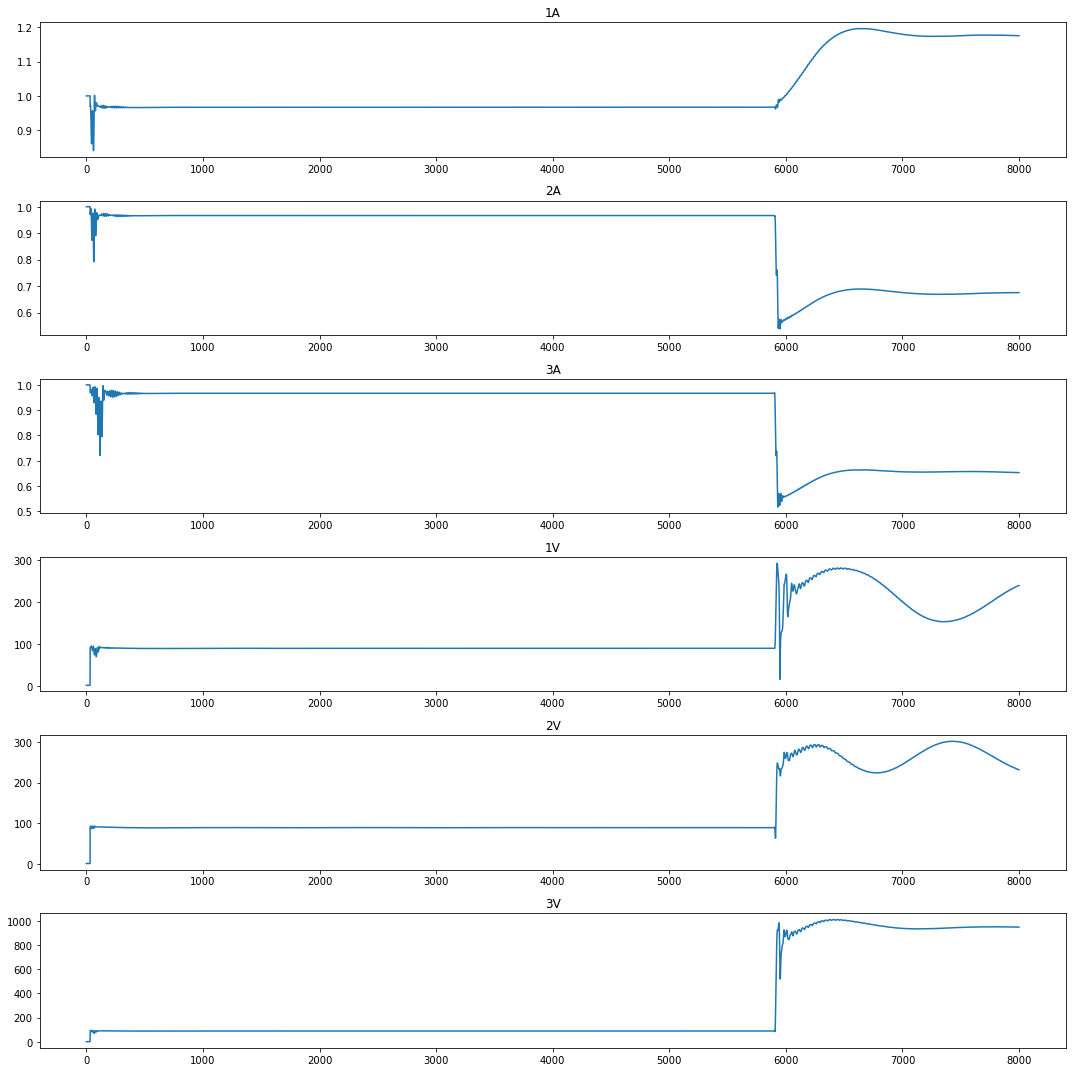

In [281]:
data = pd.read_csv('TrainingSet/CG.csv')
# storing length of columns ignoring column 'label'
col_len = data.shape[1]

# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

# assigning new column names to the dataframe
data.columns = cols 

fig, ax = plt.subplots(6,figsize=(15,15))

#normal = data[data.label == 'NML']
#abnormal = data[data.label == 'AG']
for i in range(col_len):
    ax[i].plot(data[cols[i]],"-")
    ax[i].set_title(cols[i])
fig.tight_layout()


In [ ]:
out = list(out._data)
mx = out[-1]
out = int(mx)*out

In [ ]:
time = list(eng.workspace['time']['time']._data)
data = list(eng.workspace['time']['signals']['values']._data)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time,data)


In [ ]:
num_of_samples = len(data)
time = int(data[-1]._data[-1])
print(int(data[-1]._data[-1]),num_of_samples)

In [ ]:
numbers = list(eng.workspace['time']._data)


In [ ]:
numbers

In [ ]:
import datetime as dt
time = list(data._data)
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

# convert Matlab variable "t" into list of python datetime objects
my_dict = {}
my_dict['date_time'] = [matlab2datetime(tval) for tval in time]
my_dict

In [ ]:
eng.cd('/Users/yuganthadiyal/Documents/MATLAB')

In [ ]:
eng.workspace['numbers']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(eng.workspace['numbers']._data))

In [ ]:
import h5py
f = h5py.File('results.mat', 'r')

In [ ]:
obj  = f[list(f.keys())[-1]]


In [ ]:
list(obj[0])